# Importing Packages

In [55]:
from pyspark.ml.feature import IndexToString
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark import SparkConf
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Spark Session

In [56]:
spark_conf = SparkConf().setAll(pairs = [('spark.executor.memory', '4g'), ('spark.executor.cores', '3'), ('spark.cores.max', '3'), ('spark.driver.memory','4g')])
spark = SparkSession.builder.master("local[*]").config(conf = spark_conf).appName("Loan-Data analysis").getOrCreate()
sqlContext = SQLContext(spark)

# Loading the Dataset

In [57]:
loanDf =spark.read.csv('Dataset.csv',header = True,mode="DROPMALFORMED")

# Analysing Different Features

In [7]:
data1=sqlContext.sql("Select count(target) as total ,code_gender,name_education_type from CreditTable group by code_gender,name_education_type").toPandas()

In [14]:
data2=sqlContext.sql("Select cnt_children from CreditTable").toPandas()
data2['cnt_children'].astype(int)
data2['cnt_children'].dtypes

dtype('O')

In [12]:
data3=sqlContext.sql("select avg(amt_credit) as average,name_income_type,name_housing_type,name_family_status from CreditTable group by name_income_type,name_housing_type,name_family_status").toPandas()

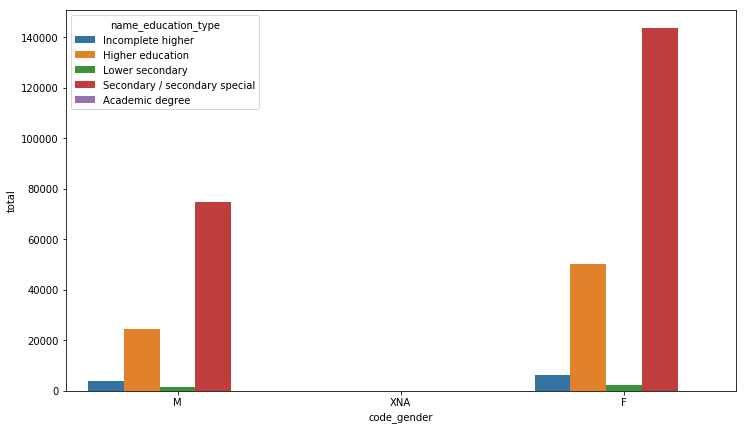

In [15]:
data1=sqlContext.sql("Select count(target) as total ,code_gender,name_education_type from CreditTable group by code_gender,name_education_type").toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='total',x='code_gender',hue='name_education_type',data=data1)


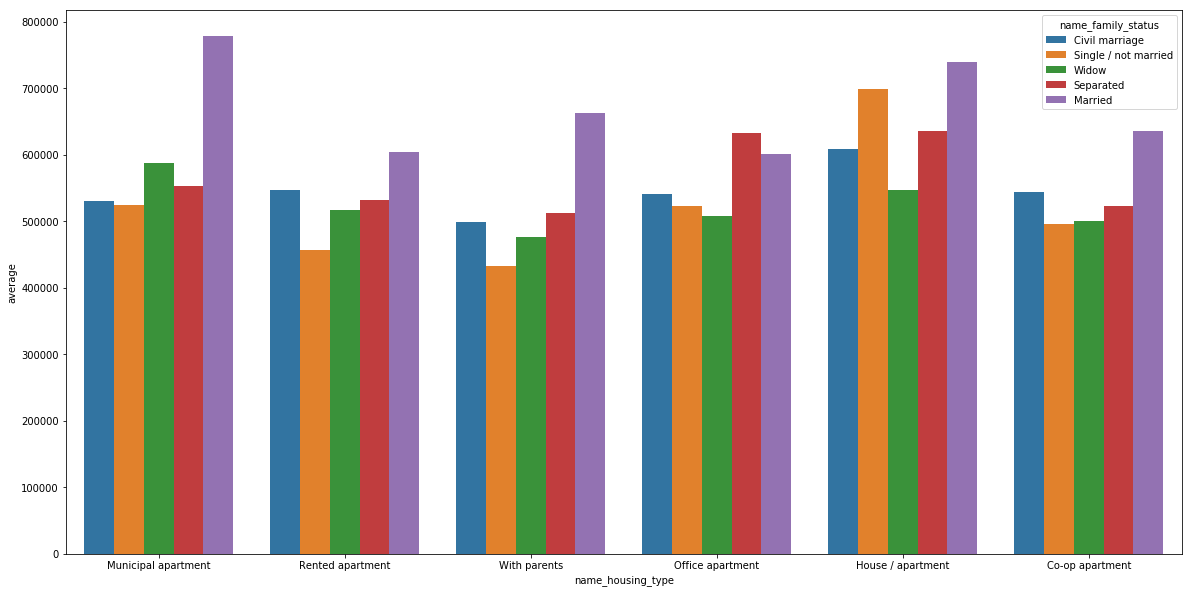

In [16]:
data3=sqlContext.sql("select avg(amt_credit) as average,name_income_type,name_housing_type,name_family_status from CreditTable group by name_income_type,name_housing_type,name_family_status").toPandas()
plt.figure(figsize=(20,10))
sns.barplot(y='average',x='name_housing_type',hue='name_family_status',data=data3,ci=None)

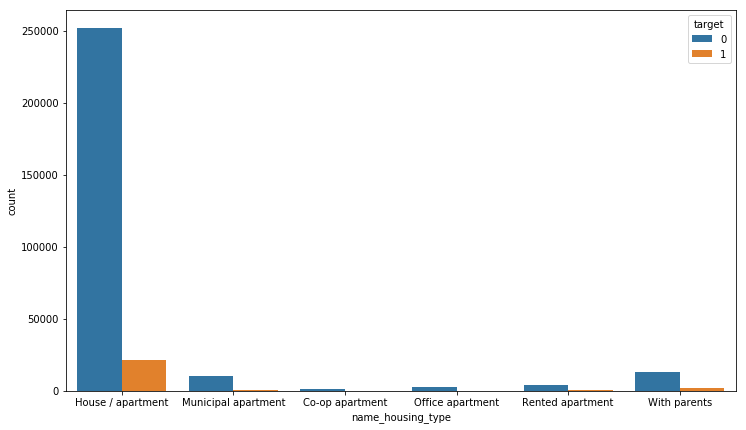

In [17]:
data4 = sqlContext.sql("Select count(target)as count,name_housing_type,target from CreditTable group by target,name_housing_type").toPandas()
plt.figure(figsize=(12,7))
sns.barplot(y='count',x='name_housing_type',hue='target',data=data4)

In [41]:
data5 = sqlContext.sql("select amt_annuity,avg(amt_income_total) as income_avg,target from CreditTable group by amt_annuity,target having income_avg<1000000 and amt_annuity<150000").toPandas()
#plt.figure(figsize=(20,17))
#plot_Income_annuity=sns.jointplot(y='income_avg',x='amt_annuity',hue='target',data=data5)
#sns.plt.ylim(0,2000000)

In [42]:
data5['amt_annuity']=data5['amt_annuity'].astype(float)

<Figure size 1440x1080 with 0 Axes>

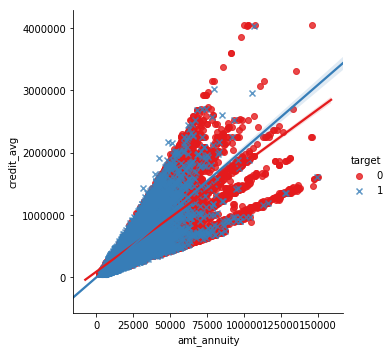

In [64]:
data5 = sqlContext.sql("select amt_annuity,avg(amt_credit) as credit_avg,target from CreditTable group by amt_annuity,target having amt_annuity<150000").toPandas()
data5['amt_annuity']=data5['amt_annuity'].astype(float)
plt.figure(figsize=(20,15))
sns.lmplot(x='amt_annuity',y='credit_avg',data=data5,robust=True,hue='target',markers=["o", "x"], palette="Set1")
#As credit amt is higher annuity is also higher

<Figure size 2160x1800 with 0 Axes>

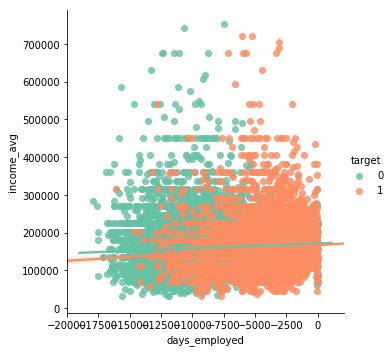

In [55]:
data6= sqlContext.sql("Select days_employed,avg(amt_income_total) as income_avg,target from CreditTable group by days_employed,target having income_avg<800000 and days_employed<100000").toPandas()
data6['days_employed']=data6['days_employed'].astype(float)
plt.figure(figsize=(30,25))
sns.lmplot(x='days_employed',y='income_avg',data=data6,robust=True,hue='target', palette="Set2")


<Figure size 720x2520 with 0 Axes>

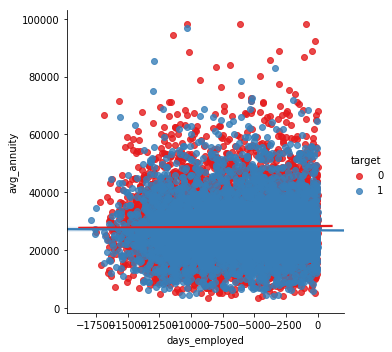

In [58]:
data7= sqlContext.sql("Select days_employed,avg(amt_annuity) as avg_annuity,target from CreditTable group by days_employed,target having avg_annuity<100000").toPandas()
data7['days_employed']=data6['days_employed'].astype(float)
plt.figure(figsize=(10,35))
sns.lmplot(x='days_employed',y='avg_annuity',data=data7,robust=True,hue='target', palette="Set1")

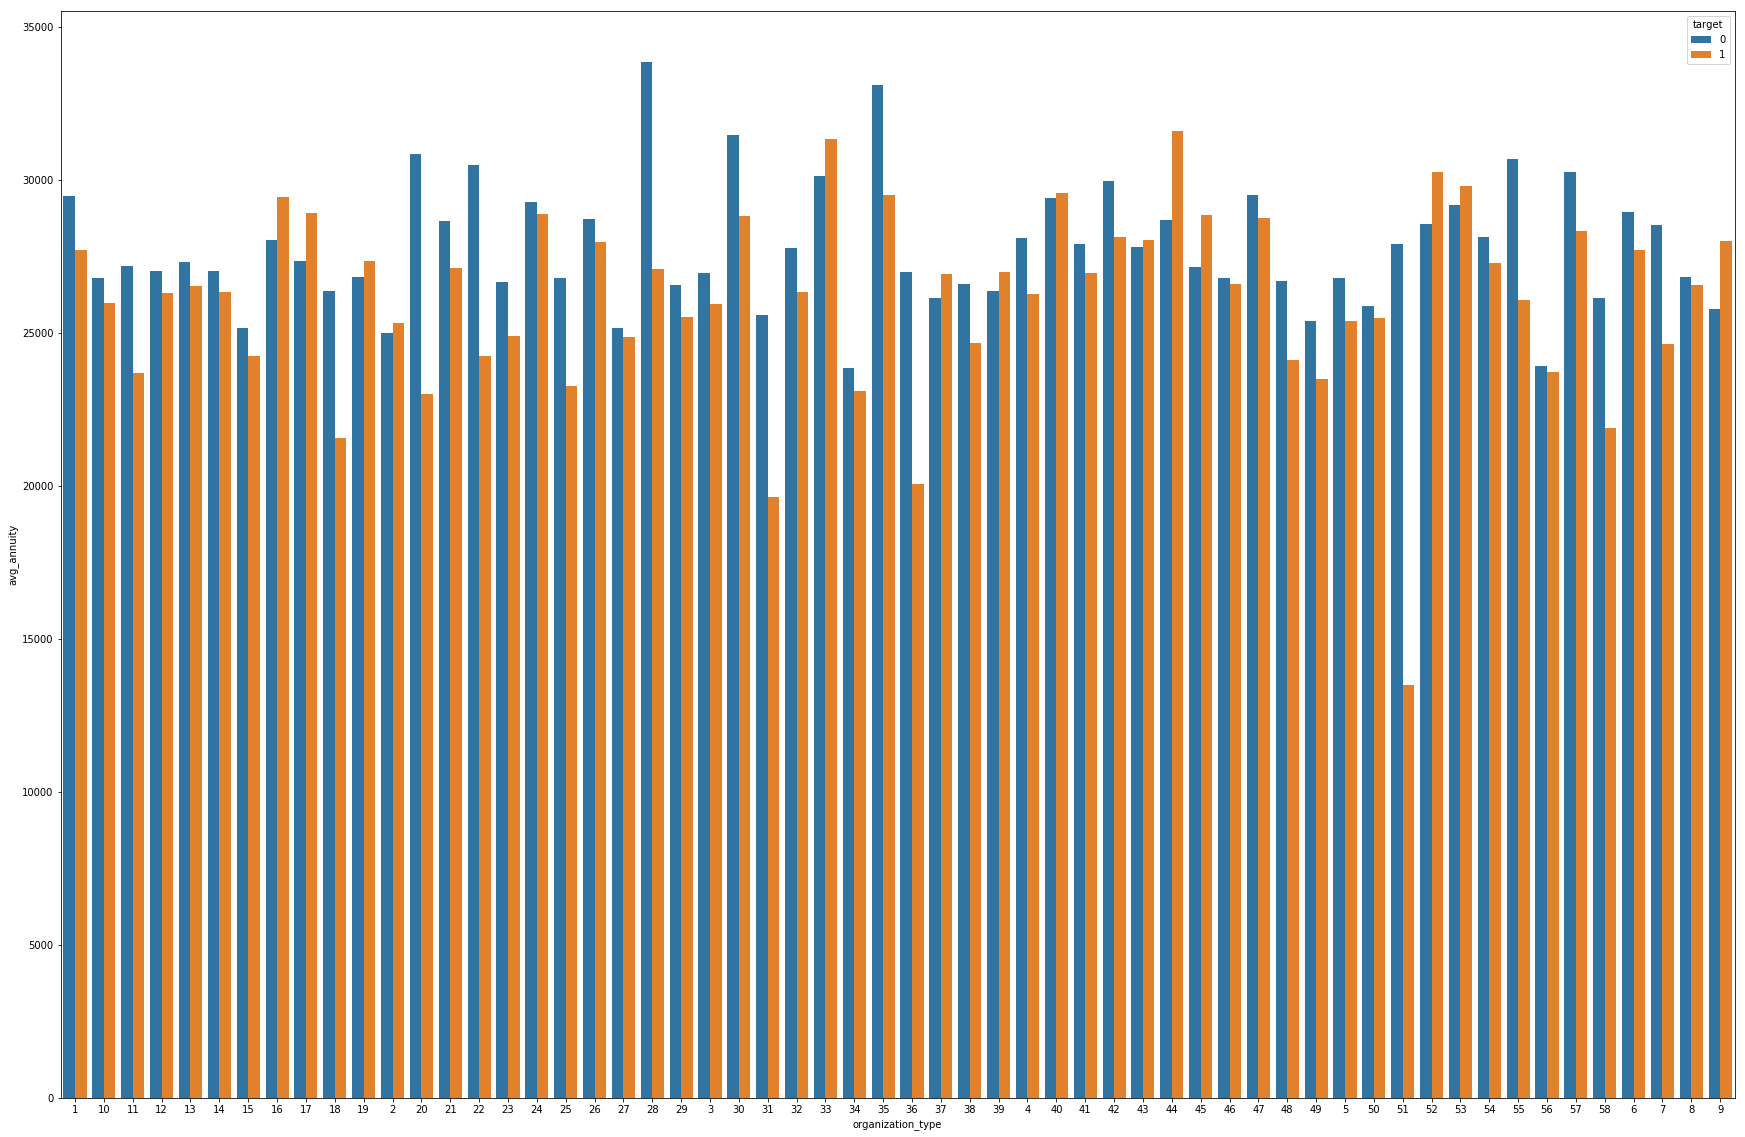

In [74]:
data8= sqlContext.sql("select avg(amt_annuity) as avg_annuity,organization_type,target from NumCreditTable group by organization_type,target").toPandas()
#data7['days_employed']=data7['days_employed'].astype(float)
plt.figure(figsize=(30,20))
#sns.lmplot(x='days_employed',y='avg_annuity',data=data7,robust=True,hue='target', palette="Set1")
sns.barplot(x='organization_type',y='avg_annuity',hue='target',data=data8)


In [ ]:
#people in legal services have higher repayment and higher income

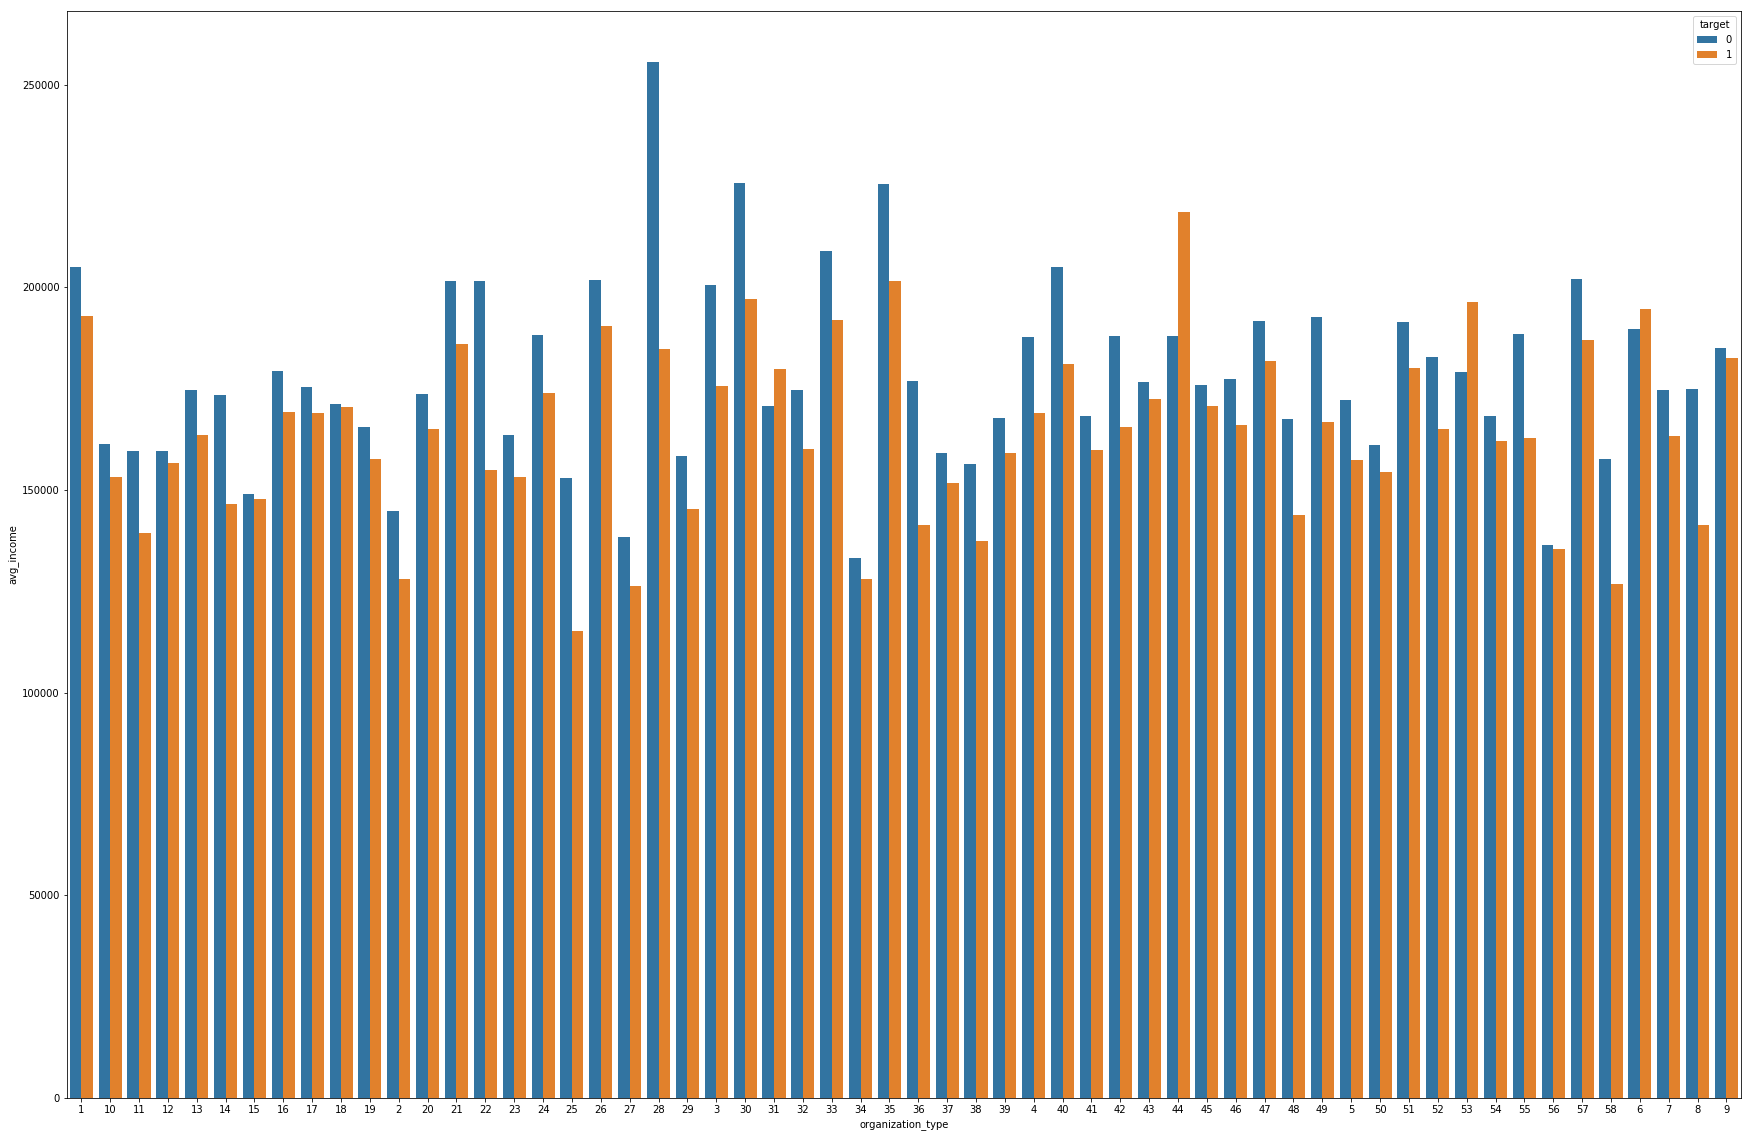

In [75]:
data8= sqlContext.sql("select avg(amt_income_total) as avg_income,organization_type,target from NumCreditTable group by organization_type,target").toPandas()
plt.figure(figsize=(30,20))
sns.barplot(x='organization_type',y='avg_income',hue='target',data=data8)

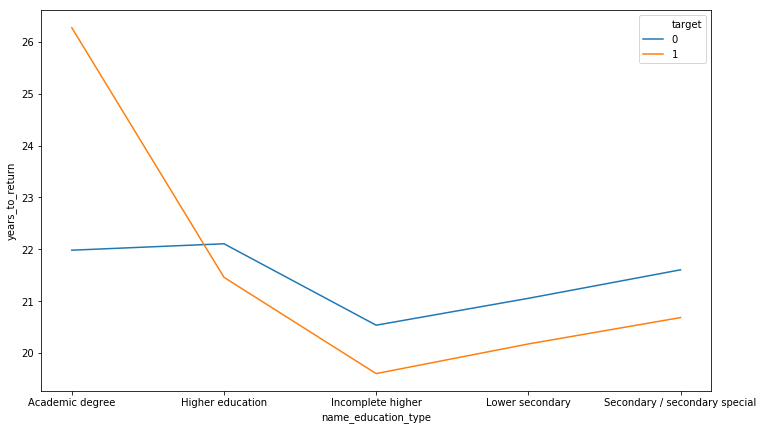

In [113]:

data9 = sqlContext.sql("select avg(amt_credit/amt_annuity) as years_to_return,name_education_type,target from CreditTable group by name_education_type,target").toPandas()
#plt.figure(figsize=(30,20))
#sns.barplot(x='organization_type',y='total',hue='target',data=data9)
#data9['name_education_type'] = data9['name_education_type'].astype(int)
#data9['target'] = data9['target'].astype(int)
plt.figure(figsize=(12,7))
sns.lineplot(y='years_to_return',x='name_education_type',hue='target',data=data9)
#data9

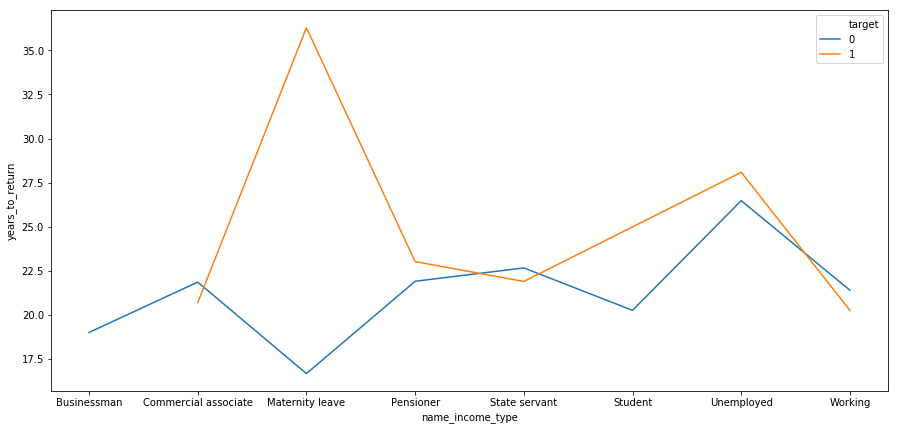

In [115]:
data10 = sqlContext.sql("select avg(amt_credit/amt_annuity) as years_to_return,name_income_type,target from CreditTable group by name_income_type,target").toPandas()
plt.figure(figsize=(15,7))
sns.lineplot(y='years_to_return',x='name_income_type',hue='target',data=data10)
#people who are unemployed take higher number of years to return


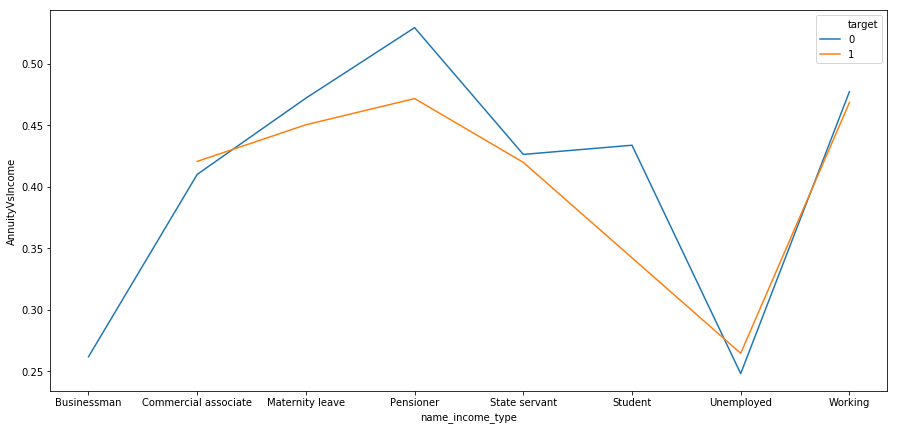

In [125]:
data11 = sqlContext.sql("select avg(amt_income_total/amt_credit) as CreditVsIncome ,name_income_type,target from CreditTable group by name_income_type,target").toPandas()
plt.figure(figsize=(15,7))
sns.lineplot(y='AnnuityVsIncome',x='name_income_type',hue='target',data=data11)
#Working class people are higly capable of repaying loan as their income is more than annuity

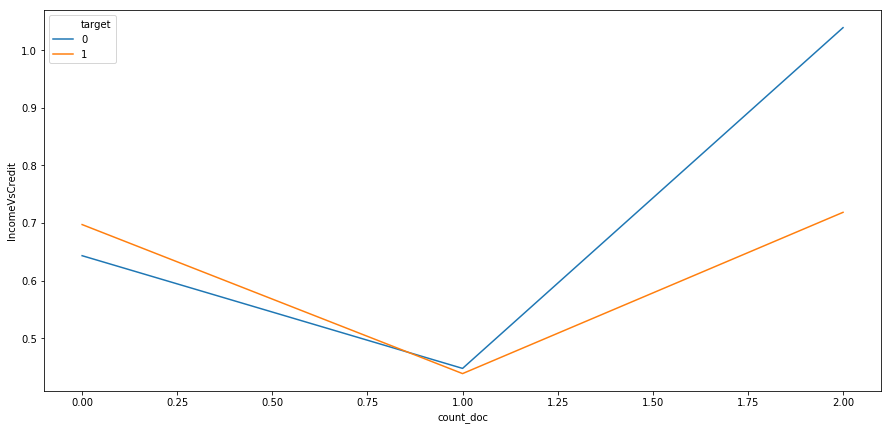

In [143]:
data12 = sqlContext.sql("select distinct(flag_document_2+flag_document_3+flag_document_4+flag_document_5+flag_document_2+flag_document_6+flag_document_7+flag_document_8+flag_document_9+flag_document_10+flag_document_11+flag_document_12) as count_doc,avg(amt_income_total/amt_credit) as IncomeVsCredit,target from CreditTable group by count_doc,target").toPandas()
plt.figure(figsize=(15,7))
sns.lineplot(y='IncomeVsCredit',x='count_doc',hue='target',data=data12)
#data12
#people who provided atleast two documents are more reliable

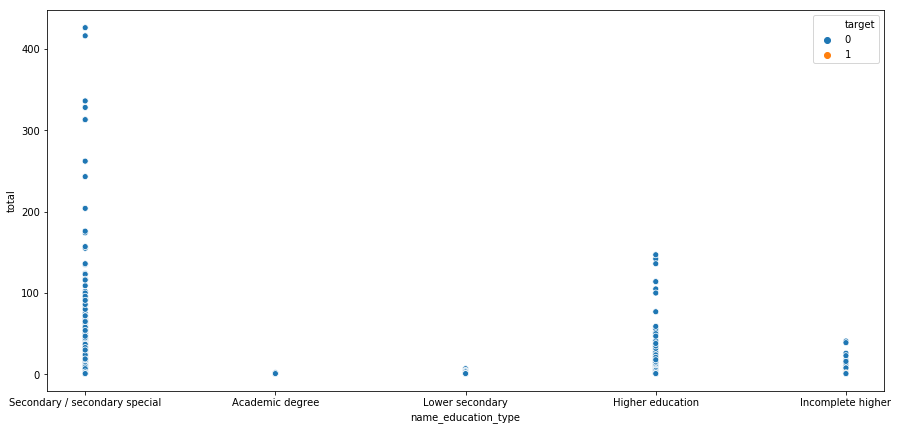

In [177]:
data13=sqlContext.sql("Select name_education_type,count(name_education_type) as total,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from CreditTable group by target,name_education_type,IncomeMoreThanLoan having IncomeMoreThanLoan>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='name_education_type',y='total',hue='target',data=data13)

#data13

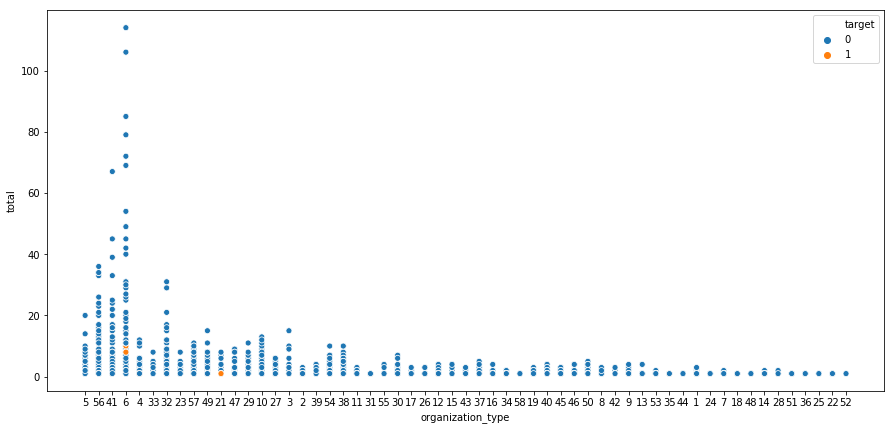

In [187]:
data14=sqlContext.sql("Select organization_type,count(organization_type) as total,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from NumCreditTable group by target,organization_type,IncomeMoreThanLoan having IncomeMoreThanLoan>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='organization_type',y='total',hue='target',data=data14)
#Business entity type

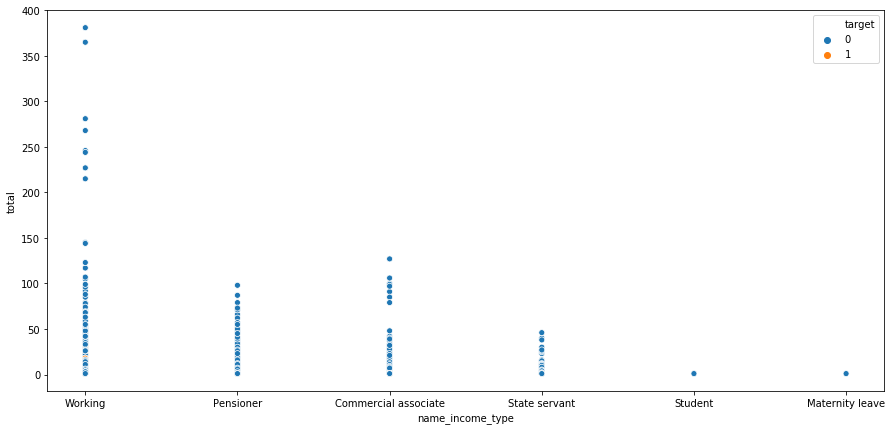

In [189]:
data15=sqlContext.sql("Select name_income_type,count(name_income_type) as total,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from CreditTable group by target,name_income_type,IncomeMoreThanLoan having IncomeMoreThanLoan>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='name_income_type',y='total',hue='target',data=data15)

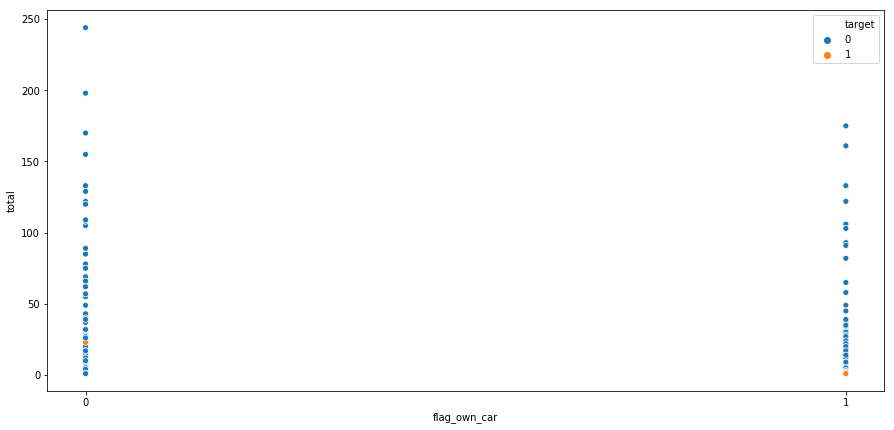

In [190]:
data15=sqlContext.sql("Select flag_own_car,count(flag_own_car) as total,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from NumCreditTable group by target,flag_own_car,IncomeMoreThanLoan having IncomeMoreThanLoan>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='flag_own_car',y='total',hue='target',data=data15)

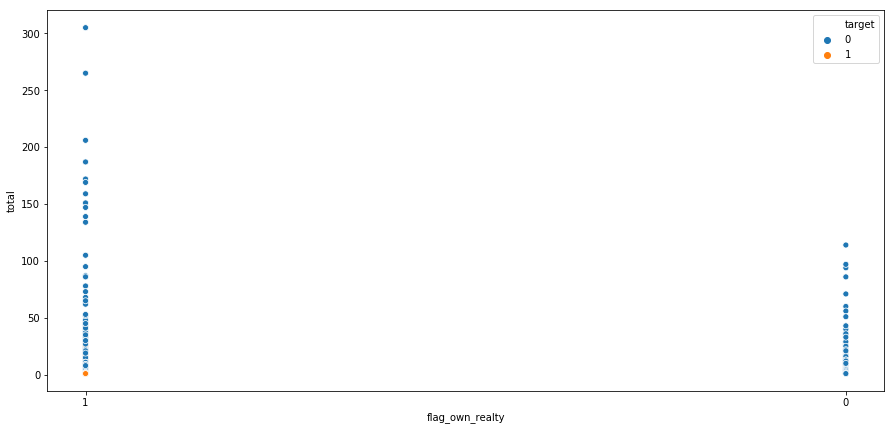

In [192]:
data16=sqlContext.sql("Select flag_own_realty,count(flag_own_realty) as total,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from NumCreditTable group by target,flag_own_realty,IncomeMoreThanLoan having IncomeMoreThanLoan>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='flag_own_realty',y='total',hue='target',data=data16)
#people who own properties have higher chances of repaying loan

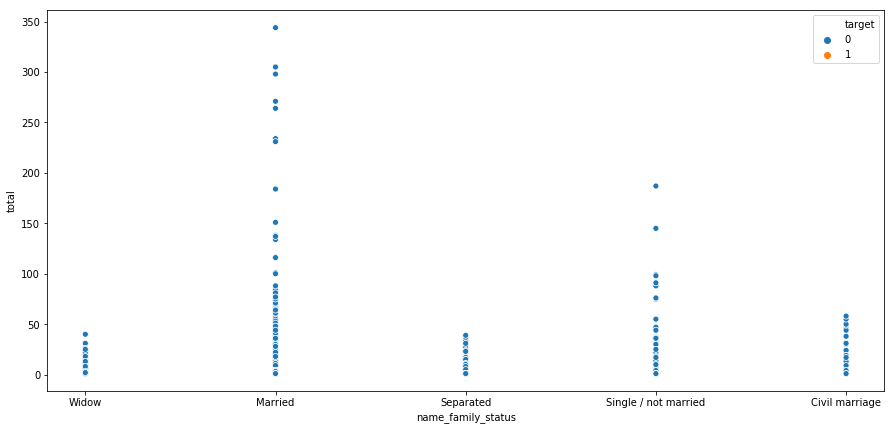

In [195]:
data17=sqlContext.sql("Select name_family_status,count(name_family_status) as total,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from CreditTable group by target,name_family_status,IncomeMoreThanLoan having IncomeMoreThanLoan>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='name_family_status',y='total',hue='target',data=data17)
#married

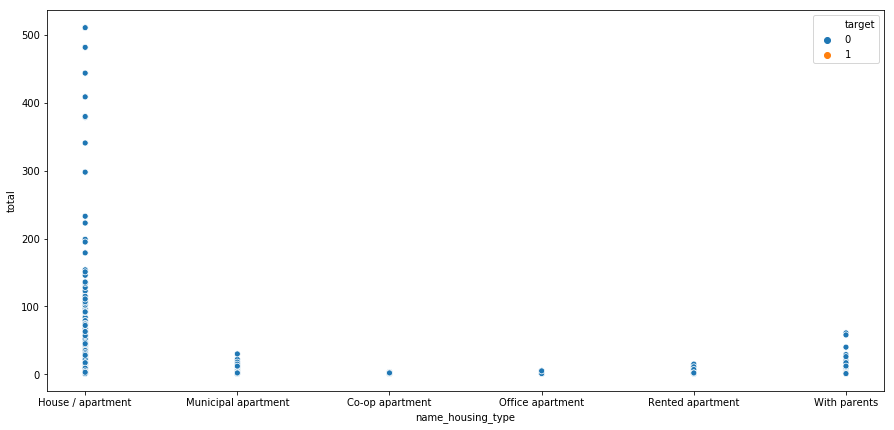

In [197]:
data18=sqlContext.sql("Select name_housing_type,count(name_housing_type) as total,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from CreditTable group by target,name_housing_type,IncomeMoreThanLoan having IncomeMoreThanLoan>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='name_housing_type',y='total',hue='target',data=data18)
#house apt performs better

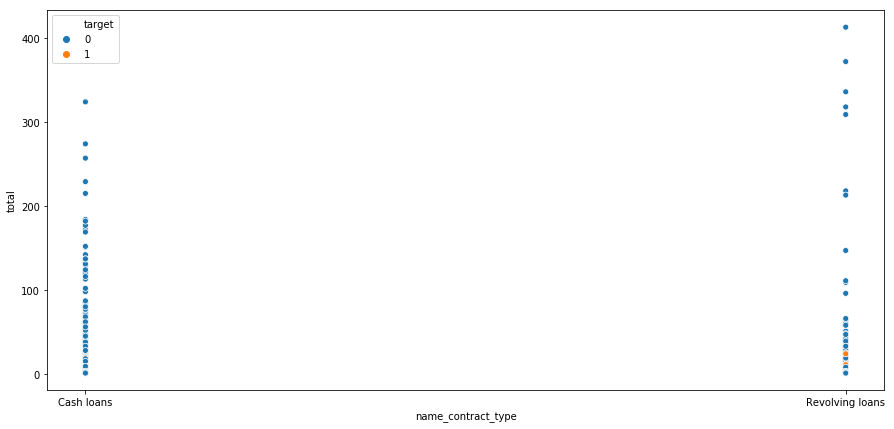

In [15]:
data17=sqlContext.sql("Select name_contract_type,count(name_contract_type) as total,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from CreditTable group by target,name_contract_type,IncomeMoreThanLoan having IncomeMoreThanLoan>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='name_contract_type',y='total',hue='target',data=data17)

In [87]:
data17=sqlContext.sql("Select count(days_employed) as day_employed_count,avg(days_employed) as day_employed_avg,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from CreditTable group by target,IncomeMoreThanLoan having IncomeMoreThanLoan>1 order by day_employed_avg,IncomeMoreThanLoan desc").toPandas()
data17=data17.drop(data17.loc[data17['day_employed_avg']>18000].index)
data17=data17.drop(data17.loc[data17['day_employed_count']<2].index)
data17

,day_employed_count,day_employed_avg,IncomeMoreThanLoan,target
109,2,168.000000,1.102374,0
126,2,177.500000,1.775000,0
130,2,178.500000,1.034702,0
222,2,242.000000,2.600000,1
246,2,255.500000,1.295262,0
249,2,263.000000,1.223158,0
256,2,267.000000,1.342756,0
257,2,267.000000,1.063183,1
273,2,283.500000,1.700000,1
277,4,285.250000,1.875000,1


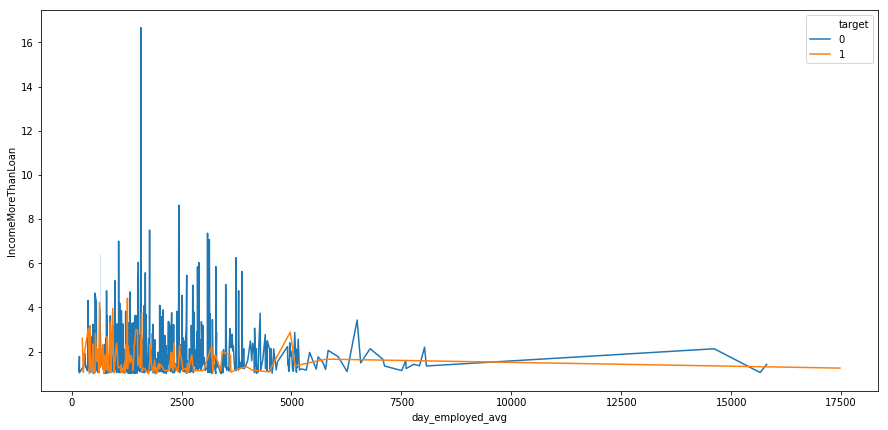

In [90]:
#data17=data17.drop(data17.loc[data17['day_employed_avg']>18000].index)
plt.figure(figsize=(15,7))
sns.lineplot(x='day_employed_avg',y='IncomeMoreThanLoan',hue='target',data=data17)
#days employe better off range 1000 to 5000

In [9]:
#data17.drop(data17.loc[data17['IncomeMoreThanLoan']>150].index,inplace=True)

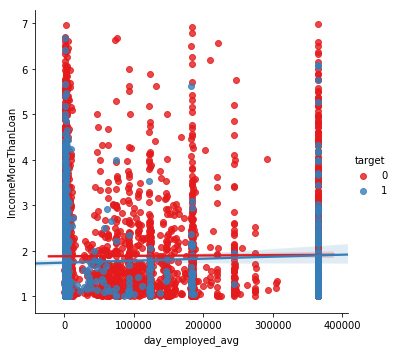

In [49]:
sns.lmplot(x='day_employed_avg',y='IncomeMoreThanLoan',data=data17,hue='target', palette="Set1")

In [11]:
data17.drop(data17.loc[data17['IncomeMoreThanLoan']>150].index,inplace=True)

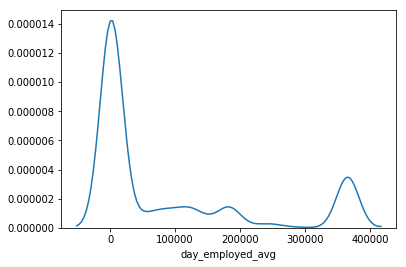

In [54]:
sns.distplot(data17['day_employed_avg'],hist=False)

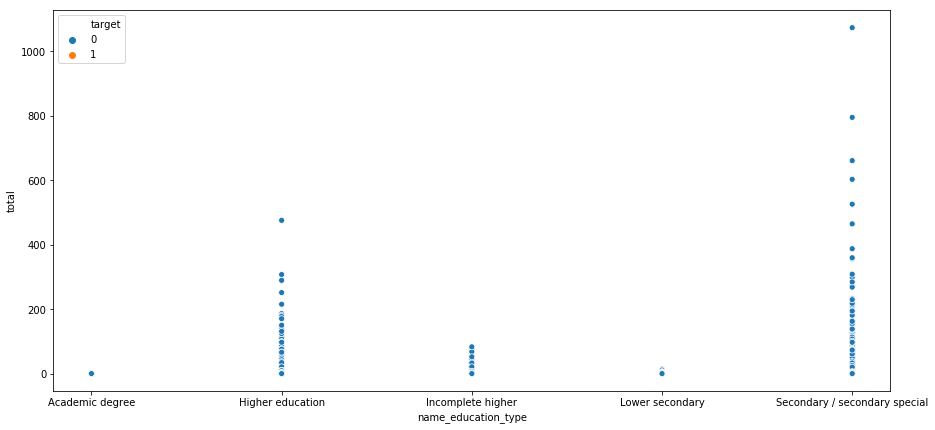

In [59]:
data18=sqlContext.sql("Select name_education_type,count(name_education_type) as total,(amt_income_total/amt_annuity) as IncomeMoreThanannuity,target from CreditTable group by target,name_education_type,IncomeMoreThanannuity having IncomeMoreThanannuity>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='name_education_type',y='total',hue='target',data=data18)
#Secondary special class people have higher income than loan

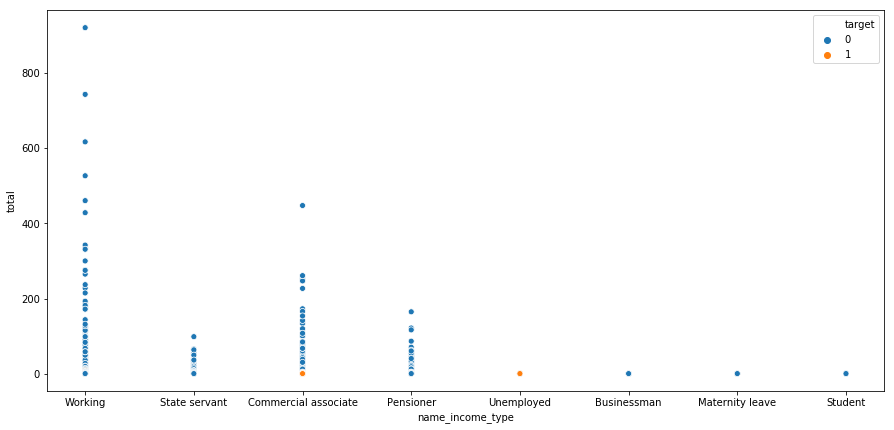

In [60]:
data19=sqlContext.sql("Select name_income_type,count(name_income_type) as total,(amt_income_total/amt_annuity) as IncomeMoreThanannuity,target from CreditTable group by target,name_income_type,IncomeMoreThanannuity having IncomeMoreThanannuity>1").toPandas()
plt.figure(figsize=(15,7))
sns.scatterplot(x='name_income_type',y='total',hue='target',data=data19)
#Working class people have higher income than loan

In [95]:
data21=sqlContext.sql("Select count(days_birth) as day_birth_count,avg(days_birth) as day_birth_avg,(amt_income_total/amt_credit) as IncomeMoreThanLoan,target from CreditTable group by target,IncomeMoreThanLoan having IncomeMoreThanLoan>1 order by day_birth_count desc").toPandas()
data21

,day_birth_count,day_birth_avg,IncomeMoreThanLoan,target
0,601,14043.282862,1.500000,0
1,595,13215.415126,1.250000,0
2,505,15487.592079,1.333333,0
3,470,14806.002128,2.000000,0
4,445,15367.671910,1.166667,0
5,433,15732.715935,1.200000,0
6,390,15113.494872,1.666667,0
7,367,12355.076294,1.125000,0
8,274,16407.656934,1.766784,0
9,247,15688.283401,1.400000,0


In [ ]:
data20 = sqlContext.sql("Select count(*) from CreditTable where name_education_type='Secondary/secondary special',name_income_type='Working' group by name_education_type,name_income_type,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,name_family_status,days_birth,days_employed,flag_mobil,flag_phone,cnt_fam_members,region_rating_client,region_rating_client_w_city,reg_region_not_live_region,reg_region_not_work_region,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12).toPandas()

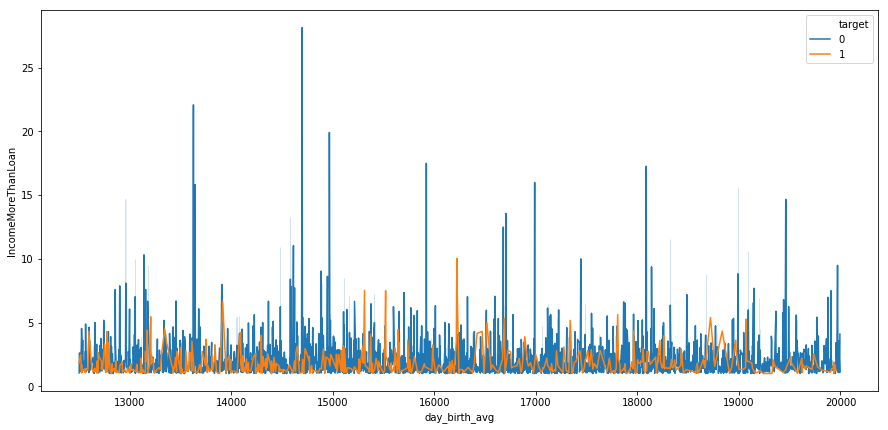

In [101]:

data21=data21.drop(data21.loc[data21['day_birth_avg']<12500].index)
data21=data21.drop(data21.loc[data21['day_birth_avg']>20000].index)
data21=data21.drop(data21.loc[data21['IncomeMoreThanLoan']>150].index)
plt.figure(figsize=(15,7))
sns.lineplot(x='day_birth_avg',y='IncomeMoreThanLoan',hue='target',data=data21)


In [ ]:
#people between age range 38 and 53 seem to have higher income to loan ratio making them highly capable of repaying the loan